# Ground truth loading notebook
This notebook is used to load the ground truth networks and visualize them.

Copyright (C) 2020  Andrew Sonta, Rishee K. Jain

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%load_ext rpy2.ipython
import src.__init__ as init
timestep = init.TIME_STEP
timesteps = int(1440/timestep)

/usr/local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


### Social (unnormalized)

[1] 0.7058824


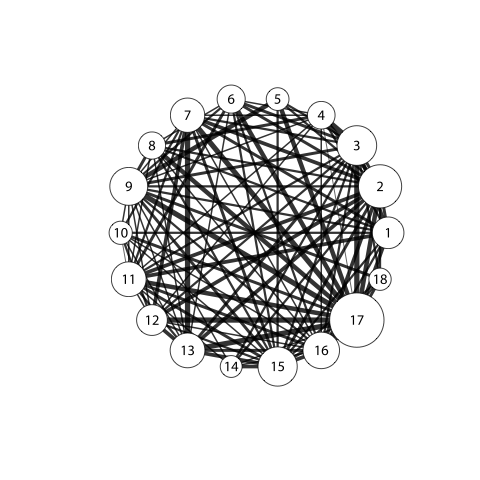

In [14]:
%%R
library(glasso)
library(igraph)

# This will only work if Myriad Pro is installed
library(showtext)
font_add("MyriadPro",
    regular = "MyriadPro-Regular.otf",
    bold = "MyriadPro-Bold.otf")
showtext_auto()

social_adj <- read.csv('ground/survey-updated/berkeley-social-adj.csv', row.names=1) 
social_adj[is.na(social_adj)] <- 0
colnames(social_adj) <- 1:18
social_graph <- graph_from_adjacency_matrix(as.matrix(social_adj), mode='undirected', weighted=TRUE, add.rownames=NULL)
lo <- layout.circle(social_graph)
V(social_graph)$size = strength(social_graph)/3 + 10
plot(social_graph, layout=lo, edge.width=E(social_graph)$weight,
     vertex.label.cex=1.2,
     vertex.label.family='MyriadPro',
     vertex.label.color='black',
     vertex.color='white',
     vertex.frame.color='black',
     edge.color=adjustcolor('black',.8),
     edge.arrow.mode=0)
edge_density(social_graph)

### Social (normalized)

[1] 0.7058824


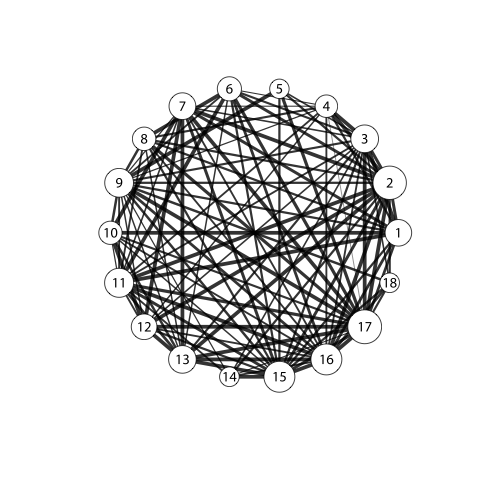

In [4]:
%%R
socialnorm_adj <- read.csv('ground/survey-updated/berkeley-social-norm-adj.csv', row.names=1) 
socialnorm_adj[is.na(socialnorm_adj)] <- 0
colnames(socialnorm_adj) <- 1:18
socialnorm_graph <- graph_from_adjacency_matrix(as.matrix(socialnorm_adj), mode='undirected', weighted=TRUE, add.rownames=NULL)
lo <- layout.circle(socialnorm_graph)
V(socialnorm_graph)$size = strength(socialnorm_graph) + 10
plot(socialnorm_graph, layout=lo, edge.width=E(socialnorm_graph)$weight*5,
    vertex.label.cex=1.2,
    vertex.label.family='MyriadPro',
    vertex.label.color='black',
    vertex.color='white',
    vertex.frame.color='black',
    edge.color=adjustcolor('black',.8),
    edge.arrow.mode=0)
edge_density(socialnorm_graph)

### Organizational

In [15]:
%%R
files = c('ground/survey-updated/berkeley-info-adj.csv','ground/survey-updated/berkeley-probsolv-adj.csv','ground/survey-updated/berkeley-support-adj.csv')
adj_names = c('info_adj','prob_adj','support_adj')
graph_names = c('info_graph','prob_graph','support_graph')

i = 1
for (file in files) {
    adj <- read.csv(file, row.names=1)
    adj[is.na(adj)] <- 0
    colnames(adj) <= 1:18
    assign(adj_names[i], adj)
    graph <- graph_from_adjacency_matrix(as.matrix(adj), mode='undirected', weighted=TRUE, add.rownames=NULL)
    assign(graph_names[i], graph)
    i = i + 1
}
print(edge_density(info_graph))
print(edge_density(prob_graph))
print(edge_density(support_graph))

[1] 0.6993464
[1] 0.5359477
[1] 0.4183007


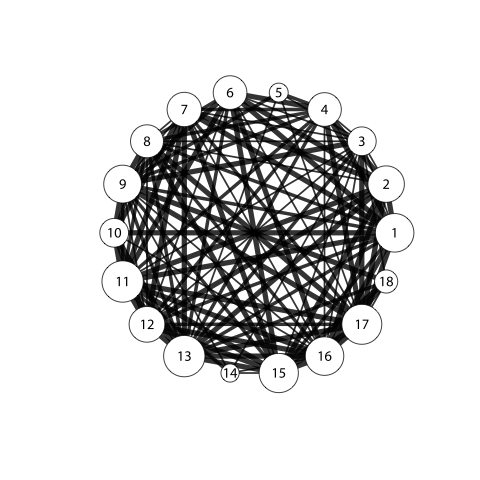

In [8]:
%%R
org_adj <- info_adj + prob_adj + support_adj
colnames(org_adj) = 1:18
org_graph <- graph_from_adjacency_matrix(as.matrix(org_adj), mode='undirected', weighted=TRUE, add.rownames=NULL)
lo <- layout.circle(org_graph)
V(org_graph)$size = strength(org_graph)/2 + 10
plot(org_graph, layout=lo, edge.width=E(org_graph)$weight*7/3,
    vertex.label.cex=1.2,
    vertex.label.family='MyriadPro',
    vertex.label.color='black',
    vertex.color='white',
    vertex.frame.color='black',
    edge.color=adjustcolor('black',.8),
    edge.arrow.mode=0)

### Overall ground truth — equal social and organizational weighting

In [10]:
%%R
ground_adj <- org_adj/3 + social_adj/7
ground_graph <- graph_from_adjacency_matrix(as.matrix(ground_adj), mode='undirected', weighted=TRUE, add.rownames=NULL)
#ground_graph <- delete_edges(ground_graph, E(ground_graph)[weight<1])
lo <- layout.circle(ground_graph)
# V(ground_graph)$size = strength(ground_graph) + 10 # Vary size of nodes based on degree
png(width=1000, height=1000, res=150, file='ground.png')
par(mar=c(0.1,0.1,0.1,0.1))
plot(ground_graph, layout=lo, edge.width=E(ground_graph)$weight*2,
     vertex.label.cex=1.2,
     vertex.label.family='MyriadPro',
     vertex.label.color='black',
     vertex.color='white',
     vertex.frame.color='black',
     edge.color=adjustcolor('black',.8),
     edge.arrow.mode=0)
edge_density(ground_graph)

[1] 0.7843137


In [9]:
%%R
write.csv(as_adj(info_graph, attr='weight', sparse=FALSE), 'data/graphs/info-adj.csv', row.names=FALSE)
write.csv(as_adj(prob_graph, attr='weight', sparse=FALSE), 'data/graphs/prob-adj.csv', row.names=FALSE)
write.csv(as_adj(support_graph, attr='weight', sparse=FALSE), 'data/graphs/support-adj.csv', row.names=FALSE)
write.csv(as_adj(socialnorm_graph, attr='weight', sparse=FALSE), 'data/graphs/socialnorm-adj.csv', row.names=FALSE)
write.csv(as_adj(org_graph, attr='weight', sparse=FALSE), 'data/graphs/org-adj.csv', row.names=FALSE)
write.csv(as_adj(ground_graph, attr='weight', sparse=FALSE), 'data/graphs/ground-adj.csv', row.names=FALSE)